<h1>PEOPLE ANALYTICS</h1>

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/dados_func.csv')

In [3]:
df.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2>VISÃO GERAL DOS DADOS<h2>

In [4]:
df_eda = df.copy()

In [5]:
df_eda.shape

(14999, 10)

In [6]:
df_eda.columns

Index(['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'deixou_empresa', 'ultima_promocao_5anos', 'area', 'salario'],
      dtype='object')

In [7]:
df_eda.isnull().sum()

nivel_satisfacao         0
ultima_avaliacao         0
numero_projetos          0
horas_medias_por_mes     0
tempo_empresa            0
acidente_trabalho        0
deixou_empresa           0
ultima_promocao_5anos    0
area                     0
salario                  0
dtype: int64

In [8]:
df_eda.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df_eda.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


---

<h2>ANÁLISE UNIVARIADA<h2>

<h3>.1) Deixou a Empresa (deixou_empresa)</h3>

In [10]:
df_ind = df.copy()

In [11]:
proporcao = pd.DataFrame(round(df_ind.groupby(['deixou_empresa'])['deixou_empresa'].count() / len(df_ind) * 100, 2))
proporcao

,deixou_empresa
deixou_empresa,
0,76.19
1,23.81


In [12]:
fig = px.pie(proporcao, values='deixou_empresa', names=['Não', 'Sim'], title='Proporção de colaboradores que deixaram a empresa')

fig.update_traces(marker=dict(colors=['#05995e', '#d12806']), textinfo='percent', textfont_size=16)

fig.update_layout(
    autosize=False,
    width=600,
    height=400
)

fig.show()

<h3>.2) Nível de Satisfação (nivel_satisfacao)</h3>

In [13]:
df_ind.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df_ind['nivel_satisfacao'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: nivel_satisfacao, dtype: float64

<AxesSubplot:xlabel='nivel_satisfacao', ylabel='Count'>

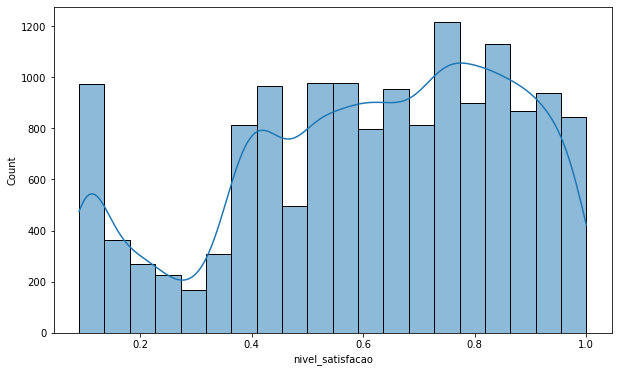

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['nivel_satisfacao'] , kde=True, bins=20)

In [16]:
def exibeBarplot(df, coluna, xlabel = 'x', ylabel = 'y', title = 'default', width=800, height=400):
    values = pd.DataFrame(df[coluna].value_counts().sort_index())
    values['percent'] = values[coluna].apply(lambda x: round(x / np.sum(values[coluna].values) * 100, 2))
    values['text1'] = values[coluna].astype(str)
    values['text2'] = values['percent'].astype(str)

    values['text'] = values['text1'] + ' [' + values['text2'] + '%]' 



    fig = px.bar(x=values.index, y=values[coluna], text=values['text'])

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [17]:
df_ind['nivel_satisfacao_bins'] = pd.cut(df_ind['nivel_satisfacao'], [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

In [18]:
exibeBarplot(df_ind, 'nivel_satisfacao_bins', title='Quantidade de nível de satisfação dos colaboradores', xlabel='Satisfação', ylabel='Quantidade')

<h3>.3) Última Avaliação (ultima_avaliacao)</h3>

In [19]:
df['ultima_avaliacao'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: ultima_avaliacao, dtype: float64

[Text(0.5, 1.0, 'Histograma da última avaliação')]

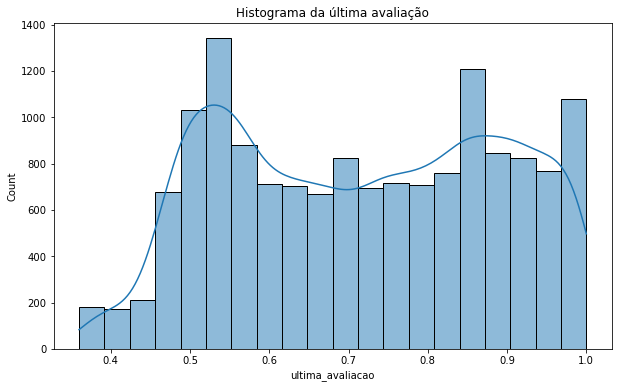

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['ultima_avaliacao'], kde=True, bins=20).set(title='Histograma da última avaliação')

In [21]:
df_ind['ultima_avaliacao_bins'] = pd.cut(df_ind['ultima_avaliacao'], [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

In [22]:
exibeBarplot(df_ind, 'ultima_avaliacao_bins', xlabel='Satisfação', ylabel='Quantidade', title='Quantidade de satisfação na última avaliação')

<h3>.4) Quantidade de Projetos (numero_projetos)</h3>

In [23]:
df_ind['numero_projetos'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: numero_projetos, dtype: float64

In [24]:
df_ind['numero_projetos'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: numero_projetos, dtype: int64

In [25]:
exibeBarplot(df_ind, coluna='numero_projetos', xlabel='Número de projetos' , ylabel='Quantidade', title='Quantidade por números de projeto', width=1000, height=600)

<h3>.5) Média de horas trabalhadas por mês (horas_medias_por_mes)</h3>

In [48]:
df_ind['horas_medias_por_mes'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: horas_medias_por_mes, dtype: float64

In [35]:
week_mean = round(df_ind['horas_medias_por_mes'].describe()['mean'] / 4.5)
print(f'A média de horas trabalhadas por semana é de {week_mean} horas')

A média de horas trabalhadas por semana é de 45 horas


In [44]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=False).head(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
803,0.10,0.77,6,310,4,0,1,0,technical,medium,péssimo [0-20],bom [60-80]
809,0.11,0.97,7,310,4,0,1,0,support,medium,péssimo [0-20],ótimo [80-100]
1717,0.11,0.96,6,310,4,0,1,0,technical,low,péssimo [0-20],ótimo [80-100]
14975,0.10,0.79,7,310,4,0,1,0,hr,medium,péssimo [0-20],bom [60-80]
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium,péssimo [0-20],ótimo [80-100]


In [45]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=True).head(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
10020,0.50,0.58,4,96,3,0,0,0,sales,low,médio [40-60],médio [40-60]
2678,0.79,0.61,5,96,4,0,0,0,marketing,medium,bom [60-80],bom [60-80]
8605,0.48,0.43,3,96,3,0,0,0,support,low,médio [40-60],médio [40-60]
7492,0.15,0.98,2,96,2,0,0,0,sales,high,péssimo [0-20],ótimo [80-100]
9221,0.92,0.82,4,96,4,0,0,0,IT,medium,ótimo [80-100],ótimo [80-100]


<h3>.6) Tempo como funcionário da empresa (tempo_empresa)</h3>

In [50]:
df_ind['tempo_empresa'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tempo_empresa, dtype: float64

In [52]:
display(df_ind.sort_values(by=['tempo_empresa'], ascending=True).head(5))
display(df_ind.sort_values(by=['tempo_empresa'], ascending=False).head(5))

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
7499,0.93,0.58,5,238,2,0,0,0,sales,medium,ótimo [80-100],médio [40-60]
3966,0.82,0.58,4,202,2,0,0,0,RandD,medium,ótimo [80-100],médio [40-60]
9324,0.57,0.66,4,158,2,0,0,0,sales,low,médio [40-60],bom [60-80]
9325,0.55,0.54,5,168,2,0,0,0,sales,low,médio [40-60],médio [40-60]
3960,0.50,0.55,3,188,2,0,0,0,product_mng,medium,médio [40-60],médio [40-60]


,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
11630,0.68,0.67,4,162,10,0,0,0,management,high,bom [60-80],bom [60-80]
11230,0.99,0.84,4,142,10,0,0,0,technical,high,ótimo [80-100],ótimo [80-100]
13742,0.67,0.72,2,134,10,0,0,0,management,high,bom [60-80],bom [60-80]
11232,0.65,0.85,4,201,10,0,0,0,support,low,bom [60-80],ótimo [80-100]
13741,0.60,0.65,2,225,10,0,0,0,management,high,médio [40-60],bom [60-80]


In [61]:
df_ind['tempo_empresa'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: tempo_empresa, dtype: int64

In [62]:
exibeBarplot(df_ind, coluna='tempo_empresa', xlabel='Tempo médio como funcionário da empresa', ylabel='Quantidade', 
                width=1300, height=600, title='Quantidade de funcionários por tempo médio em anos na empresa')

<h3>.7) Acidente de Trabalho (acidente_trabalho)</h3>

In [65]:
df_ind['acidente_trabalho'].value_counts()

0    12830
1     2169
Name: acidente_trabalho, dtype: int64

In [68]:
exibeBarplot(df_ind, coluna='acidente_trabalho', xlabel='Acidentes de trabalho', ylabel='Quantidade', 
                title='Quantidade de pessoas que sofreram acidades de trabalho', width=600)

<h3>.8) Promoção do funcionário nos últimos 5 anos (ultima_promocao_5anos)</h3>

In [70]:
df_ind['ultima_promocao_5anos'].value_counts()

0    14680
1      319
Name: ultima_promocao_5anos, dtype: int64

In [73]:
exibeBarplot(df_ind, coluna='ultima_promocao_5anos', xlabel='Promoção [0 = Não|1 = Sim]', width=600, height=400,
                title='Quantidade de promoções por quantidade de funcionários nos últimos 5 anos')

<h3>.9) Área de atuação (area)</h3>

In [80]:
exibeBarplot(df_ind, coluna='area', xlabel='Áreas de atuação', ylabel='Quantidade', 
            title='Quantidade de pessoas por cargo', width=1300, height=500)

<h3>.10) Salário categórico (salario)</h3>

In [83]:
exibeBarplot(df_ind, coluna='salario', xlabel='Categorias de salário', ylabel='Quantidade', 
            title='Quantidade por categoria de salário', width=900, height=500)

---

<h2>ANÁLISE MULTIVARIADA<h2>